# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

Description of project: Cournot duopoly

Equations:
Aggregate demand
Individual profit functions (used to find aggregate supply)

Analytical solution:
Find individual response functions

Grid search:
Try different outputs and check that supply equates demand.

Extensions:
Add more periods -> Easier to collude (påkrævet)
Vary delta -> see how collusion is harder to sustain
Vary homogeniety of products
Vary costs - draw from distribution (påkrævet)
Entry/exit 
Simulate model over time - plot quantity/price for different shocks to parameters (Corona-stød?)

Sjove plot (påkrævet)
Set up as class?

Introduction

The aim of this paper is to develop an algorithm to simulate the behavioral interaction of firms in the Cournot model and consequently to capture the essential features of the strategic interaction in the model and predict the behavior of the firms.

The Cournot model describes oligopoly markets where the firms produce homogeneous products and maximize profits by engaging in strategic interaction by setting quantities simultaneously. In the model the market price is determined by the total supply, and it is assumed that each firm will not change its quantity in response to the output of others. Furthermore, the firms are considered to have complete information about the market and the actions of its competitors. Given the features of the Cournot model this paper has particular emphasis on firm behavior with various degrees of competition, different cost levels between the firms and the strategic interaction between the firms when the model runs more than one period.


In [60]:
import numpy as np
import sympy as sm

from scipy.stats import norm
from numpy import array
import matplotlib.pyplot as plt
import plotly.graph_objs as go

%matplotlib inline
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
sol=modelproject.mynewfun(100)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
       x: [ 2.066e-02  1.326e-02 ...  1.485e-02  1.950e-02]
    nfev: 3
    njev: 1
    fjac: [[-2.265e-01 -1.132e-01 ... -1.132e-01 -1.132e-01]
           [ 6.912e-01 -7.185e-01 ... -9.095e-03 -9.095e-03]
           ...
           [ 1.343e-02  1.343e-02 ... -9.934e-01 -1.767e-04]
           [ 1.325e-02  1.325e-02 ...  1.325e-02 -9.935e-01]]
       r: [ 8.832e+00  8.719e+00 ...  1.360e-02  1.007e+00]
     qtf: [-9.177e-16  5.049e-18 ... -5.963e-18 -5.883e-18]

x = [0.02065774 0.01325759 0.00395889 0.02082973 0.01040301] 
h(x) = [0. 0. 0. 0. 0.] 
sum(x) = 0.9781259658973326 
marginal cost= [0.0012163  0.00861645 0.01791515 0.00104431 0.01147103] 
profit= [4.26742068e-04 1.75763574e-04 1.56727743e-05 4.33877594e-04
 1.08222516e-04] 
N_firms = 75


In [62]:
print(sol.c_vec_init,sol.x0)

[0.05678787 0.06671962 0.0012163  0.00861645 0.01791515 0.00104431
 0.01147103 0.00495983 0.00537525 0.00619019 0.03352609 0.00341235
 0.02240993 0.00747678 0.00801759 0.00844377 0.03006674 0.0108601
 0.00995634 0.00178609 0.02879327 0.00080628 0.00147986 0.0369306
 0.01528669 0.00625522 0.00365652 0.00397753 0.01870872 0.01429288
 0.00981456 0.01247537 0.02010944 0.02303685 0.0018907  0.00054944
 0.00952525 0.00955636 0.04372496 0.00598282 0.00512506 0.00355821
 0.12246487 0.01112515 0.01437758 0.03041426 0.00553374 0.04687036
 0.11898259 0.00056433 0.10979436 0.01140248 0.0135581  0.03243347
 0.01138708 0.01238249 0.0110513  0.0095327  0.01454913 0.01498746
 0.01402363 0.01219719 0.00247347 0.00476398 0.03203713 0.00400003
 0.00776431 0.05428856 0.0046319  0.02196171 0.01167903 0.02400523
 0.13486055 0.01913343 0.0141436  0.0061754  0.00175862 0.02886471
 0.16132136 0.00626008 0.01740596 0.02034611 0.0069029  0.11354112
 0.0052414  0.0416732  0.00979942 0.01464671 0.01058949 0.002698

Demand and cost

In [ ]:
#Class which does not work

import numpy as np
import sympy as sm

from scipy.stats import norm
import scipy.optimize as optimize
from numpy import array
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from types import SimpleNamespace

class CournotClass:

    def __init__(self,N,seed):

        # a. create namespaces
        par = self.par = SimpleNamespace()
        sol = self.sol = SimpleNamespace()

        # N      = N  # Number of variables
        par.N_init = N
        par.N = N

        np.random.seed(seed)
        par.c_vec = 0.01*np.random.lognormal(mean=0,sigma=1,size=N)
        par.c_vec_init = par.c_vec.copy()

        # Setting up the initial values for x
        par.index    = np.array(range(par.N))
        par.x0       = np.zeros(par.N)
        par.x_nonneg = np.zeros(par.N, dtype=bool)
        sol.alpha = np.nan
        sol.sigma = np.nan

        # Defining symbolic variables for the optimization problem
        x = sm.symbols('x')  # Symbolic variable representing x
        x_rest = sm.symbols('x_rest')  # Symbolic variable representing x_rest
        c=sm.symbols('c')

        # Defining the objective function
        #penalty = 100  # choose a suitable penalty value
        objective = (1 - x - x_rest - c) * x

        self.objective_lambd=sm.lambdify(args=(x,x_rest,c),expr=objective)

        # Taking the first derivative of the objective function w.r.t x
        obj_dif = sm.diff(objective, x)
        # Converting the symbolic expression for the derivative into a callable function
        self.best = sm.lambdify(args=(x, x_rest,c), expr=obj_dif)

        # Taking the second derivative of the objective function w.r.t x
        best_dif = sm.diff(obj_dif, x)

        # Converting the symbolic expression for the second derivative into a callable function
        self.jac_x = sm.lambdify(args=(x, x_rest), expr=best_dif)

        # Taking the second derivative of the objective function w.r.t x_rest
        best_dif = sm.diff(obj_dif, x_rest)

        # Converting the symbolic expression for the second derivative into a callable function
        self.jac_x_rest = sm.lambdify(args=(x, x_rest), expr=best_dif)

    def h(self, x, c_vec, N):
        
        par = self.par
        sol = self.sol
        N=par.N

        y = np.zeros(N)
        for i in range(N):
            # Evaluating the first derivative of the objective function at x[i]
            #c_rand = norm.rvs(loc=0, scale=0.001)
            y[i] = self.best(x[i], sum(x) - x[i], par.c_vec[i])

        return y

    # Defining the Jacobian of the function to be optimized
    def hp(self, x, N):
        
        par = self.par
        sol = self.sol
        N=par.N

        y = np.zeros((N, N))
        for i in range(N):
            for j in range(N):
                if j == i:
                    # Evaluating the second derivative of the objective function w.r.t x[i]
                    y[i,j] = self.jac_x(x[i], sum(x) - x[i])
                else:
                    # Evaluating the second derivative of the objective function w.r.t x_rest[i]
                    y[i,j] = self.jac_x_rest(x[i], sum(x) - x[i])

        return y

    def lol(self,k):
        par=self.par
        sol=self.sol
        return par.c_vec

    def solve_model(self, seed=2000):
        
        par = self.par
        sol = self.sol

        while not all(par.x_nonneg):

            # Solving the optimization problem using scipy.optimize.root() function
            result = optimize.root(lambda x0: self.h(par.x0,par.c_vec,par.N), par.x0, jac=lambda x0: self.hp(par.x0,par.N))

            par.x0 = result.x
            par.x_nonneg = (par.x0 >= 0).astype(bool)
            
            par.c_vec = par.c_vec[par.x_nonneg]
            par.x0    = par.x0[par.x_nonneg]
            par.N     = np.sum(par.x_nonneg)
            par.index = par.index[par.x_nonneg]

        profit=self.objective_lambd(result.x,np.sum(result.x)-result.x,par.c_vec)
        # Printing the results
        print(result)
        print('\nx =', result.x[0:10], '\nh(x) =', self.h(par.x0,par.c_vec,par.N)[0:10], '\nsum(x) =', sum(result.x), '\nmarginal cost=',par.c_vec[0:7],'\nprofit=', profit[0:10],'\nN_firms =',par.N)

cournot=CournotClass(10,2000) ## Mærkeligt. mynewfun bestemmer antal virksomheder.
cournot.lol(2)
cournot.solve_model()

In [8]:
# Plotting c_vec
plt.figure(figsize=(8,6))
plt.plot(c_vec, color='blue')
plt.xlabel('Firm index')
plt.ylabel('Marginal cost')
plt.title('Marginal cost for each firm')

# Plotting result.x
plt.figure(figsize=(8,6))
plt.plot(result.x, color='red')
plt.xlabel('Firm index')
plt.ylabel('Output')
plt.title('Optimal output for each firm')

# Plotting profit
plt.figure(figsize=(8,6))
plt.plot(profit, color='green')
plt.xlabel('Firm index')
plt.ylabel('Profit')
plt.title('Profit for each firm')

plt.show()


NameError: name 'c_vec' is not defined

<Figure size 800x600 with 0 Axes>

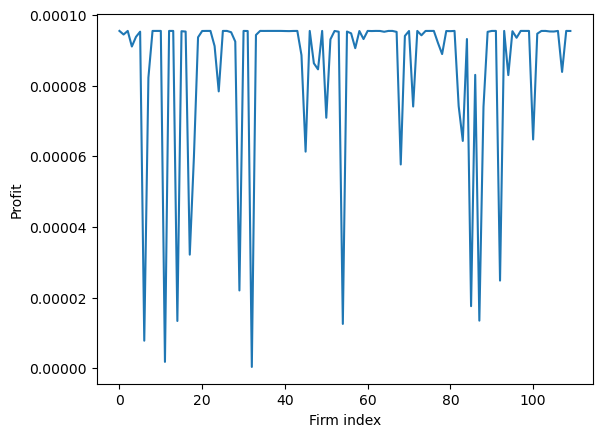

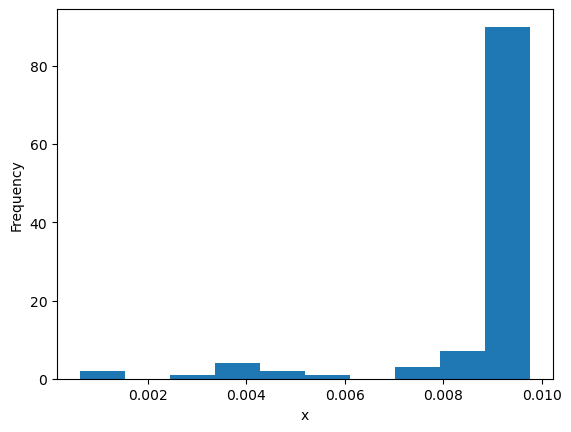

In [14]:
plt.plot(np.arange(len(profit)), profit)
plt.xlabel('Firm index')
plt.ylabel('Profit')
plt.show()

plt.hist(result.x)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.show()


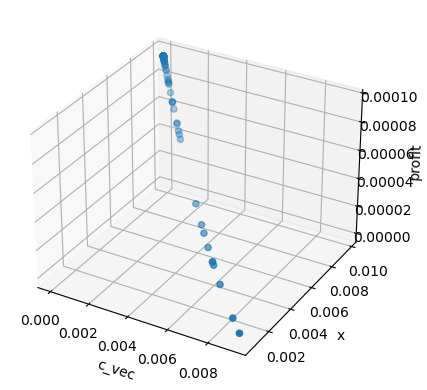

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(c_vec_new, result.x, profit)

ax.set_xlabel('c_vec')
ax.set_ylabel('x')
ax.set_zlabel('profit')

plt.show()



In [18]:
# create 3D scatter plot with colors based on profit values
fig = go.Figure(data=[go.Scatter3d(x=result.x, y=c_vec, z=profit,
                                   mode='markers',
                                   marker=dict(color=profit, colorscale='Viridis', opacity=0.8)
                                   )])

# add axis labels and title
fig.update_layout(scene=dict(xaxis_title='x',
                             yaxis_title='c_vec',
                             zaxis_title='profit'),
                  title=dict(text='Profit vs x and c_vec', x=0.5, y=0.9))

fig.show()


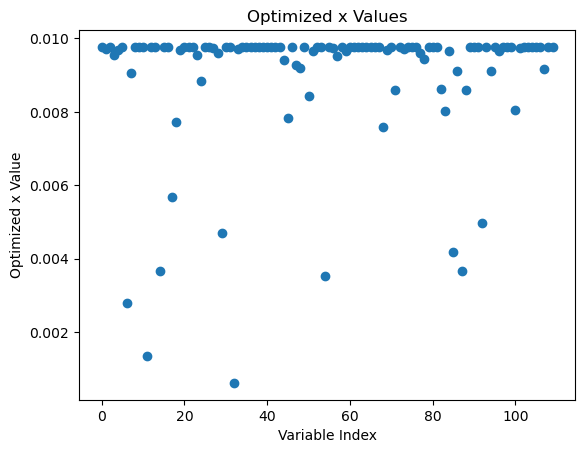

In [19]:
import matplotlib.pyplot as plt

# Plotting the optimized x values
plt.scatter(range(N), result.x)

# Adding axis labels and title
plt.xlabel('Variable Index')
plt.ylabel('Optimized x Value')
plt.title('Optimized x Values')

# Displaying the plot
plt.show()


# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 